Credit Card Fraud Detection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df=df.dropna()

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 53570 entries, 0 to 53569
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53570 non-null  int64  
 1   V1      53570 non-null  float64
 2   V2      53570 non-null  float64
 3   V3      53570 non-null  float64
 4   V4      53570 non-null  float64
 5   V5      53570 non-null  float64
 6   V6      53570 non-null  float64
 7   V7      53570 non-null  float64
 8   V8      53570 non-null  float64
 9   V9      53570 non-null  float64
 10  V10     53570 non-null  float64
 11  V11     53570 non-null  float64
 12  V12     53570 non-null  float64
 13  V13     53570 non-null  float64
 14  V14     53570 non-null  float64
 15  V15     53570 non-null  float64
 16  V16     53570 non-null  float64
 17  V17     53570 non-null  float64
 18  V18     53570 non-null  float64
 19  V19     53570 non-null  float64
 20  V20     53570 non-null  float64
 21  V21     53570 non-null  float64
 22  V22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,...,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000
mean,30004.564887,-0.243201,0.000596,0.691601,0.179645,-0.257872,0.102920,-0.119319,0.052876,0.094530,...,-0.028933,-0.106716,-0.039090,0.007830,0.135096,0.020158,0.003957,0.003972,94.260870,0.002856
std,13302.488835,1.879610,1.639442,1.483719,1.393862,1.411110,1.313148,1.271581,1.214940,1.201759,...,0.731813,0.636945,0.593273,0.596080,0.438590,0.500092,0.388427,0.329538,252.290845,0.053366
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,23663.250000,-0.994265,-0.573633,0.212440,-0.724005,-0.873923,-0.636808,-0.606015,-0.147113,-0.630291,...,-0.230588,-0.528988,-0.179410,-0.322721,-0.128328,-0.330573,-0.063648,-0.006589,7.680000,0.000000
50%,34250.500000,-0.249507,0.078156,0.790679,0.189544,-0.290127,-0.152452,-0.075340,0.058870,-0.013048,...,-0.066126,-0.082401,-0.051736,0.062416,0.174351,-0.073699,0.008850,0.022405,25.495000,0.000000
75%,40126.750000,1.154648,0.732524,1.424781,1.061898,0.281796,0.493768,0.425499,0.333528,0.780881,...,0.110099,0.307958,0.079102,0.401967,0.421204,0.298577,0.083071,0.076498,86.867500,0.000000
max,46048.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

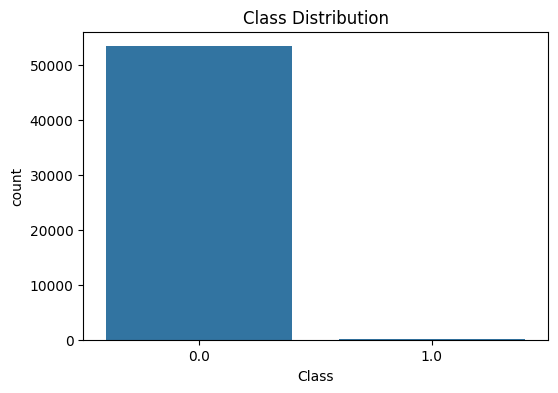

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution')
plt.show()

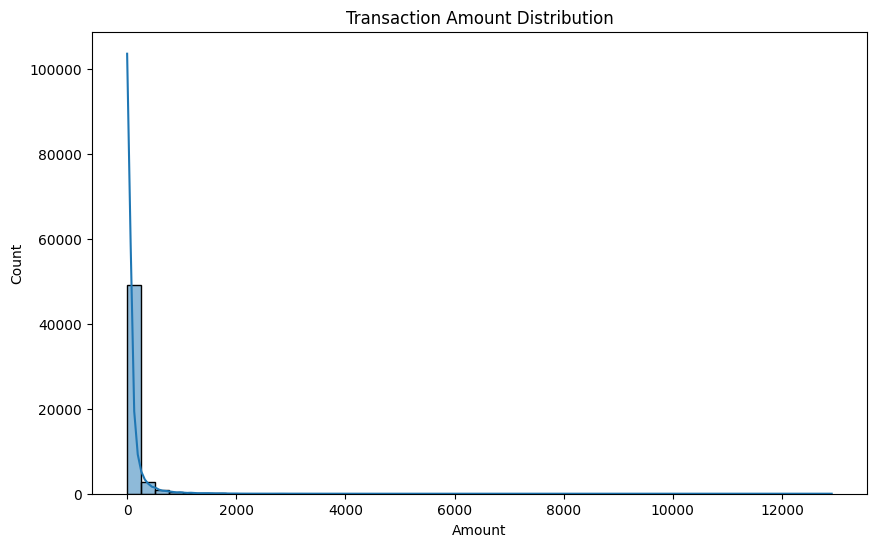

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

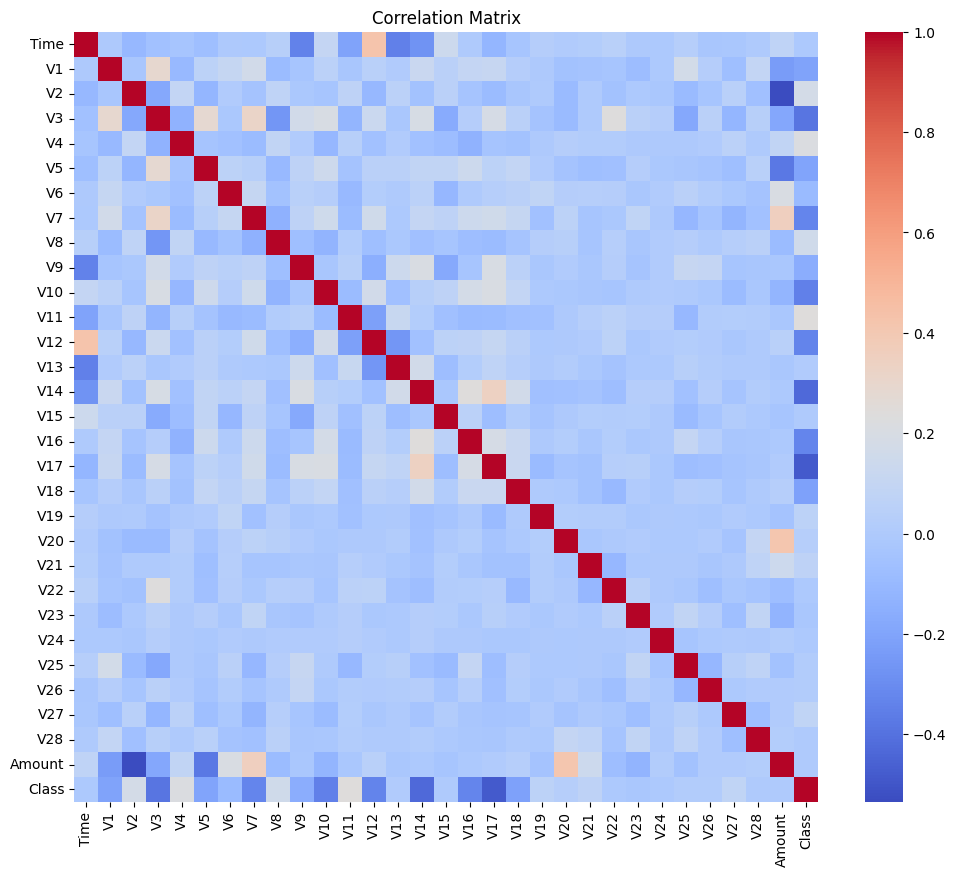

In [12]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


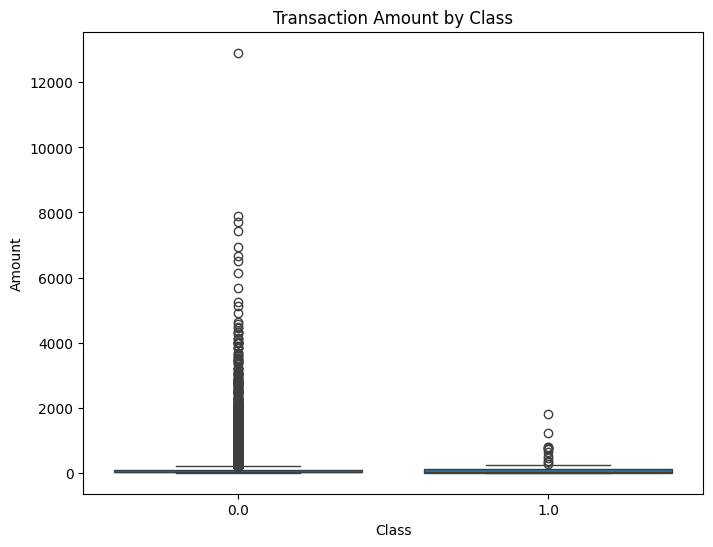

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

In [15]:
X=df.drop('Class',axis=1)
y=df['Class']

In [16]:
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [17]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_scaled,y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [19]:
# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
# Train a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
# Evaluate the Logistic Regression model
y_pred_lr = logistic_regression.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model Evaluation:
[[10664   141]
 [  331 10231]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     10805
         1.0       0.99      0.97      0.98     10562

    accuracy                           0.98     21367
   macro avg       0.98      0.98      0.98     21367
weighted avg       0.98      0.98      0.98     21367



In [23]:
# Evaluate the Random Forest model
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Model Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:
[[10804     1]
 [    2 10560]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10805
         1.0       1.00      1.00      1.00     10562

    accuracy                           1.00     21367
   macro avg       1.00      1.00      1.00     21367
weighted avg       1.00      1.00      1.00     21367

